<a href="https://colab.research.google.com/github/kushal-arya/Data-Science-Projects/blob/main/datascience_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('telco-customer-churn.csv')


In [ ]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Check for missing, null, and NaN records
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
# Handle missing values (if any)
data.fillna(value=0, inplace=True)  # Fill missing values with 0 (you can choose an appropriate strategy)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Drop unnecessary columns like 'CustomerID' (assuming it's not useful for modeling)
data.drop('customerID', axis=1, inplace=True)

In [ ]:
# Function to map binary categorical data
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying binary mapping to binary features
binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    data[feature] = binary_map(data[feature])

# Encode 'SeniorCitizen' as it is already in numeric form (1, 0)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

# Convert the TotalCharges column to numeric. It might have some spaces or non-numeric values.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle any conversion errors (e.g., spaces) by replacing NaN values with the mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Label Encoding for the rest of the categorical features
label_enc = LabelEncoder()
cat_features = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for col in cat_features:
    data[col] = label_enc.fit_transform(data[col])

# Now all the categorical data are converted into numerical format
print(data.head(5))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [ ]:
# List all types of data
numeric_columns = data.select_dtypes(include=np.number).columns
categorical_columns = data.select_dtypes(include='object').columns

print("Numeric Columns:\n", numeric_columns)
print("\nCategorical Columns:\n", categorical_columns)

Numeric Columns:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Categorical Columns:
 Index([], dtype='object')


In [ ]:
# Check for outliers (assuming numerical columns only)
numeric_columns = data.select_dtypes(include=[np.number])
outliers = {}
for col in numeric_columns.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].shape[0]

print("Outliers:\n", outliers)


Outliers:
 {'gender': 0, 'SeniorCitizen': 1142, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 682, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 0, 'Churn': 0}


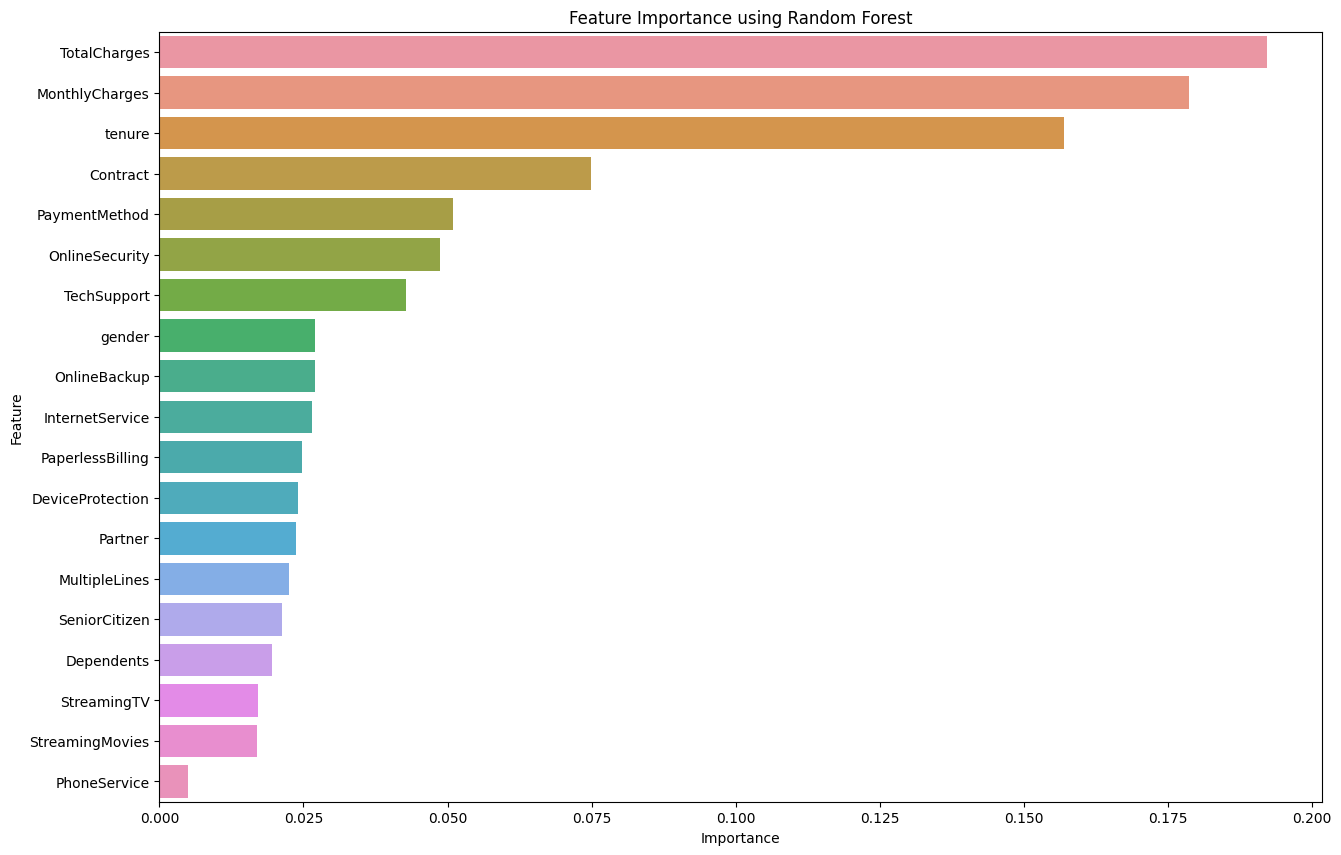

In [ ]:
# Feature importance using a simple linear model for EDA
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Churn', axis=1)
y = data['Churn']

clf = RandomForestClassifier()
clf.fit(X, y)

# Extracting importance
importance = clf.feature_importances_

# Create DataFrame for importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance})

# Sorting the features based on importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plotting feature importance
plt.figure(figsize=(15,10))
sns.barplot(data=feature_importance, x="Importance", y="Feature")
plt.title("Feature Importance using Random Forest")
plt.show()

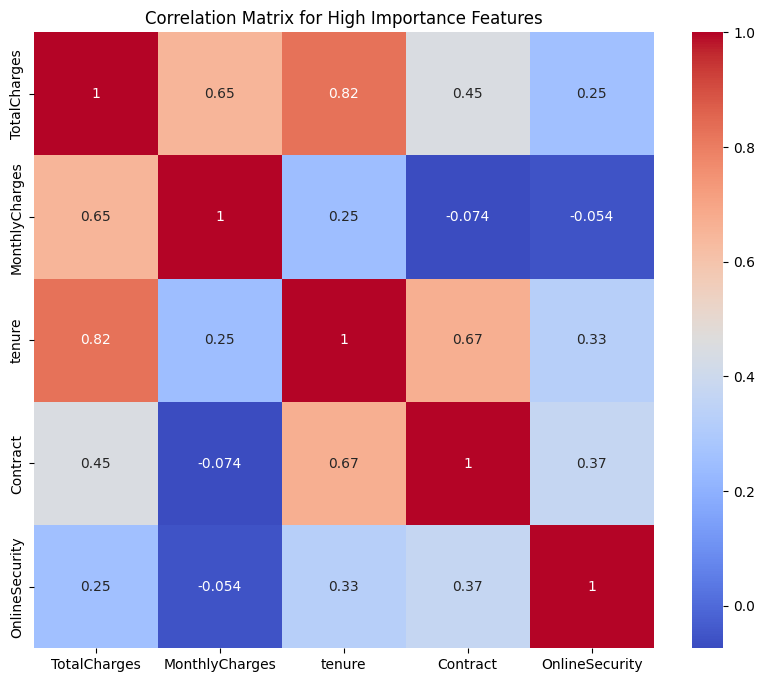

In [ ]:
high_importance_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'OnlineSecurity']
# Creating a subset of the DataFrame with only the high importance features
df_high_importance = data[high_importance_features]
corr_matrix_high_importance = df_high_importance.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_high_importance, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for High Importance Features")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats


# Apply MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled[:, :-1], data_scaled[:, -1], test_size=0.20, random_state=42)





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoiding warning messages
}



In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

# Training and Evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}\n")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8162, Precision: 0.6792, Recall: 0.5791, F1 Score: 0.6252

Training Naive Bayes...
Naive Bayes - Accuracy: 0.7580, Precision: 0.5293, Recall: 0.7748, F1 Score: 0.6289

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.7644, Precision: 0.5612, Recall: 0.5040, F1 Score: 0.5311

Training Decision Tree...
Decision Tree - Accuracy: 0.7324, Precision: 0.4947, Recall: 0.5013, F1 Score: 0.4980

Training Random Forest...
Random Forest - Accuracy: 0.7999, Precision: 0.6655, Recall: 0.4906, F1 Score: 0.5648

Training XGBoost...
XGBoost - Accuracy: 0.7821, Precision: 0.6078, Recall: 0.4987, F1 Score: 0.5479



Training Logistic Regression...

Logistic Regression - Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Logistic Regression - Confusion Matrix
[[934 102]
 [157 216]]


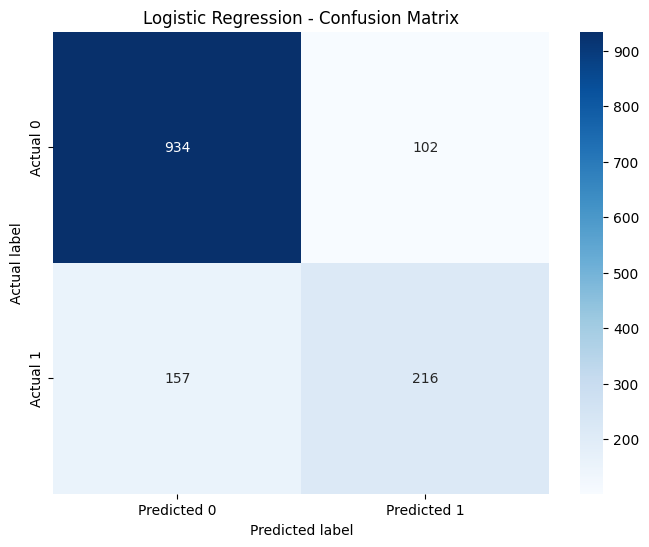

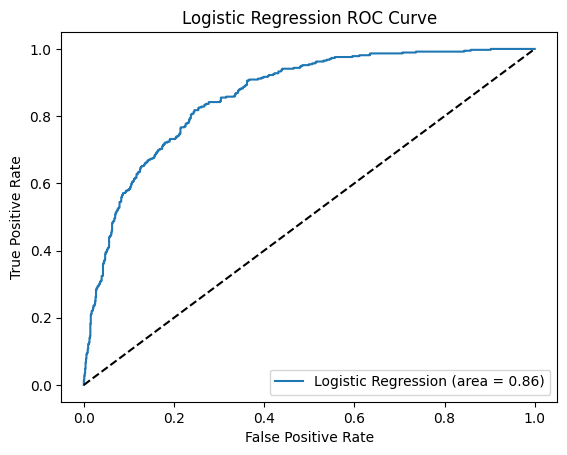



Training Naive Bayes...

Naive Bayes - Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1036
         1.0       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Naive Bayes - Confusion Matrix
[[779 257]
 [ 84 289]]


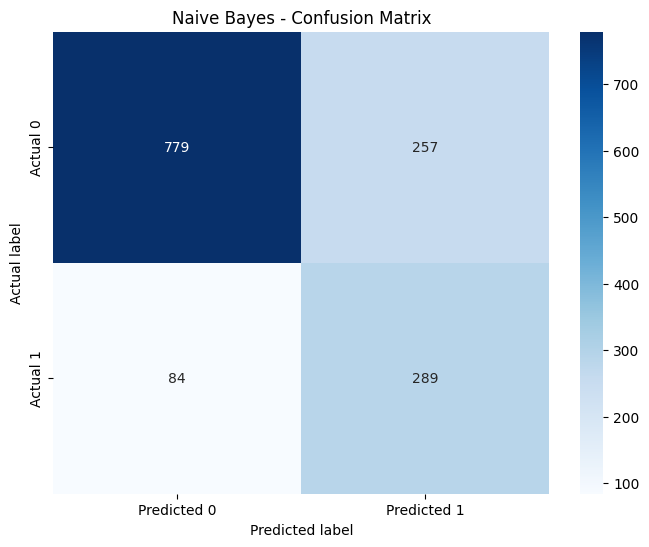

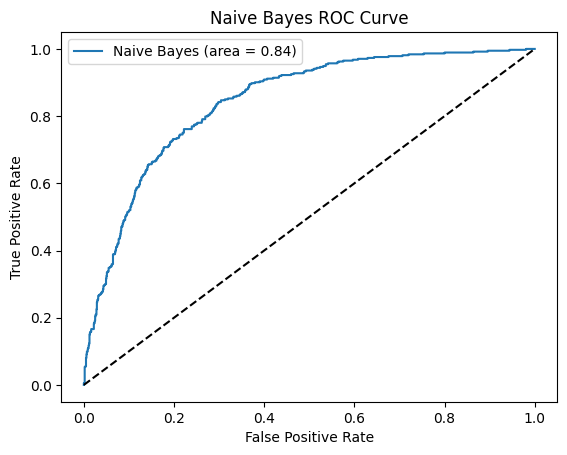



Training K-Nearest Neighbors...

K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      1036
         1.0       0.56      0.50      0.53       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409

K-Nearest Neighbors - Confusion Matrix
[[889 147]
 [185 188]]


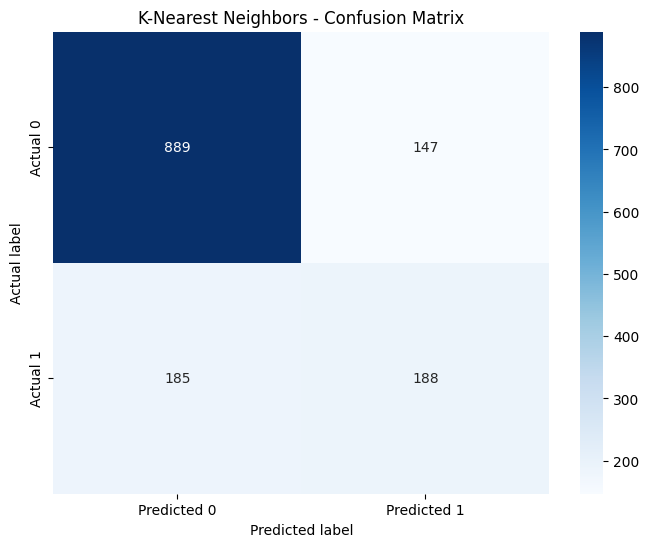

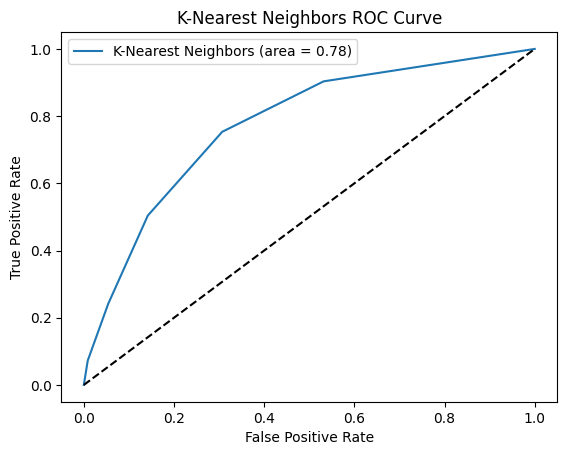



Training Decision Tree...

Decision Tree - Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1036
         1.0       0.48      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Decision Tree - Confusion Matrix
[[841 195]
 [190 183]]


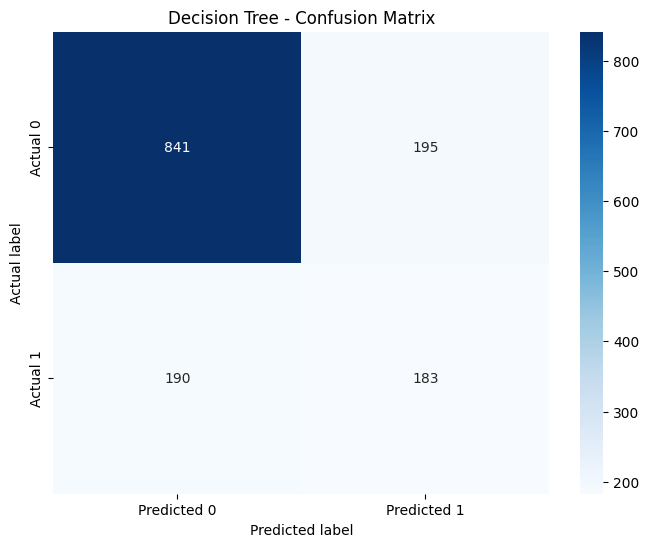

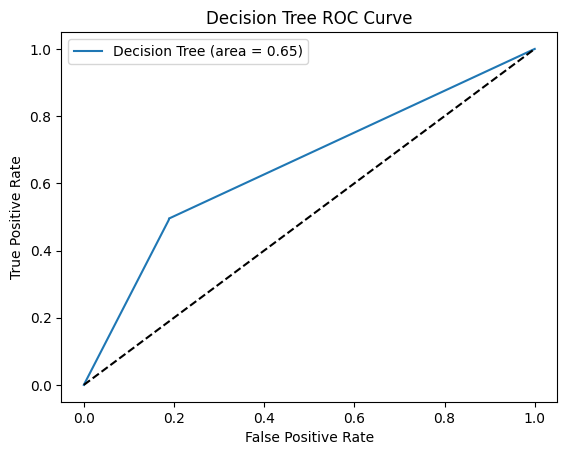



Training Random Forest...

Random Forest - Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest - Confusion Matrix
[[945  91]
 [199 174]]


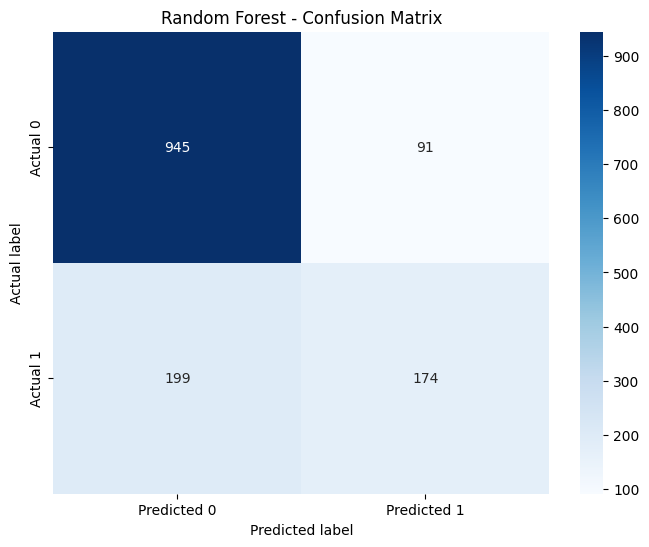

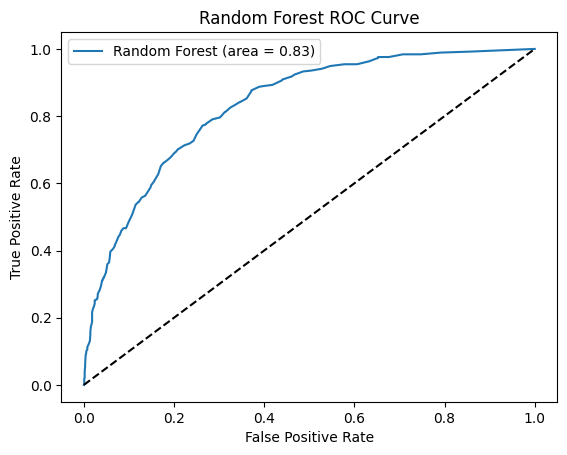



Training XGBoost...

XGBoost - Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1036
         1.0       0.61      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

XGBoost - Confusion Matrix
[[916 120]
 [187 186]]


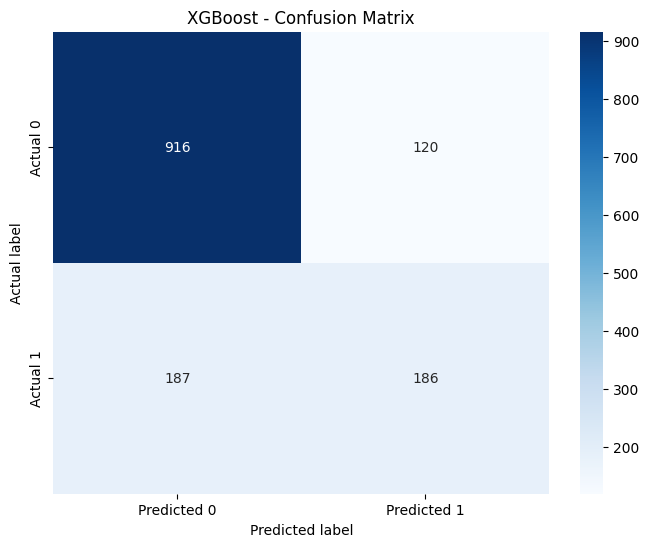

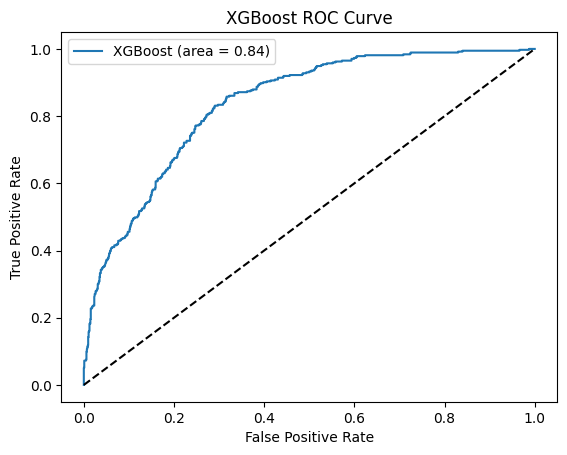

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Training, predicting, and evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

    # Classification report
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))

     # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix")
    print(cm)

    # Visualizing the Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='best')
    plt.show()
    print("\n")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train, X_test, y_test are already defined

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Grid Search with Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

# Retrieve the best parameters found by GridSearchCV
best_params = grid_lr.best_params_

# Create a new LogisticRegression model with the best parameters
optimized_lr = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Fit the optimized model on the training data
optimized_lr.fit(X_train, y_train)

# Predict on the test data with the optimized model
y_pred_optimized = optimized_lr.predict(X_test)

# Evaluate the optimized model's performance
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_optimized))
print("Accuracy of the optimized model:", accuracy_score(y_test, y_pred_optimized))


Best parameters for Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Best score for Logistic Regression: 0.7981897585661804
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy of the optimized model: 0.8161816891412349


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, y_train, X_test, y_test are already defined

# Define parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search with K-Nearest Neighbors
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for K-Nearest Neighbors:", grid_knn.best_params_)
print("Best score for K-Nearest Neighbors:", grid_knn.best_score_)

# Retrieve the best parameters found by GridSearchCV
best_params_knn = grid_knn.best_params_

# Create a new KNeighborsClassifier model with the best parameters
optimized_knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],
                                     weights=best_params_knn['weights'],
                                     metric=best_params_knn['metric'])

# Fit the optimized model on the training data
optimized_knn.fit(X_train, y_train)

# Predict on the test data with the optimized model
y_pred_optimized_knn = optimized_knn.predict(X_test)

# Evaluate the optimized model's performance
print(classification_report(y_test, y_pred_optimized_knn))
print("Accuracy of the optimized KNN model:", accuracy_score(y_test, y_pred_optimized_knn))


Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best score for K-Nearest Neighbors: 0.7685469368842603
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1036
         1.0       0.59      0.55      0.57       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy of the optimized KNN model: 0.7806955287437899


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

best_params_rf = grid_rf.best_params_

# Create a new RandomForestClassifier model with the best parameters
optimized_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                      max_depth=best_params_rf['max_depth'],
                                      min_samples_split=best_params_rf['min_samples_split'],
                                      random_state=42) # Optional: provide a random state for reproducibility

# Fit the optimized model on the training data
optimized_rf.fit(X_train, y_train)

# Predict on the test data with the optimized model
y_pred_optimized_rf = optimized_rf.predict(X_test)

# Evaluate the optimized model's accuracy
accuracy_optimized_rf = accuracy_score(y_test, y_pred_optimized_rf)
print("Accuracy of the optimized Random Forest model:", accuracy_optimized_rf)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.80049550749329
Accuracy of the optimized Random Forest model: 0.8055358410220014


In [ ]:
print(classification_report(y_test, y_pred_optimized_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409



In [ ]:
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Grid Search with XGBoost
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# Retrieve the best parameters found by GridSearchCV
best_params_xgb = grid_xgb.best_params_

# Create a new XGBClassifier model with the best parameters
optimized_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')

# Fit the optimized model on the training data
optimized_xgb.fit(X_train, y_train)

# Predict on the test data with the optimized model
y_pred_optimized_xgb = optimized_xgb.predict(X_test)

# Evaluate the optimized model's performance
accuracy_optimized_xgb = accuracy_score(y_test, y_pred_optimized_xgb)
print(classification_report(y_test, y_pred_optimized_xgb))
print("Accuracy of the optimized XGBoost model:", accuracy_optimized_xgb)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score for XGBoost: 0.8004972411390998
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1036
         1.0       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy of the optimized XGBoost model: 0.8119233498935415


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Grid Search with Naive Bayes
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# Best parameters and score for Naive Bayes
print("Best parameters for Naive Bayes:", grid_nb.best_params_)
print("Best score for Naive Bayes:", grid_nb.best_score_)



# Create a new model with the best parameters found by GridSearchCV
optimized_nb = GaussianNB(var_smoothing=grid_nb.best_params_['var_smoothing'])


# Fit the optimized models on the training data
optimized_nb.fit(X_train, y_train)


# Predict on the test data with the optimized models
y_pred_optimized_nb = optimized_nb.predict(X_test)


# Evaluate the optimized models' performance
print("\nNaive Bayes - Optimized Model Evaluation")
print(classification_report(y_test, y_pred_optimized_nb))
print("Accuracy of the optimized Naive Bayes model:", accuracy_score(y_test, y_pred_optimized_nb))



Best parameters for Naive Bayes: {'var_smoothing': 1.0}
Best score for Naive Bayes: 0.7646449729787659

Naive Bayes - Optimized Model Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1036
         1.0       0.58      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409

Accuracy of the optimized Naive Bayes model: 0.7814052519517388


In [ ]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search with Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and score for Decision Tree
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best score for Decision Tree:", grid_dt.best_score_)

optimized_dt = DecisionTreeClassifier(
    max_depth=grid_dt.best_params_['max_depth'],
    min_samples_split=grid_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_dt.best_params_['min_samples_leaf'],
    criterion=grid_dt.best_params_['criterion']
)

optimized_dt.fit(X_train, y_train)

y_pred_optimized_dt = optimized_dt.predict(X_test)


print("\nDecision Tree - Optimized Model Evaluation")
print(classification_report(y_test, y_pred_optimized_dt))
print("Accuracy of the optimized Decision Tree model:", accuracy_score(y_test, y_pred_optimized_dt))

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score for Decision Tree: 0.769434878747236

Decision Tree - Optimized Model Evaluation
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1036
         1.0       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Accuracy of the optimized Decision Tree model: 0.7721788502484032


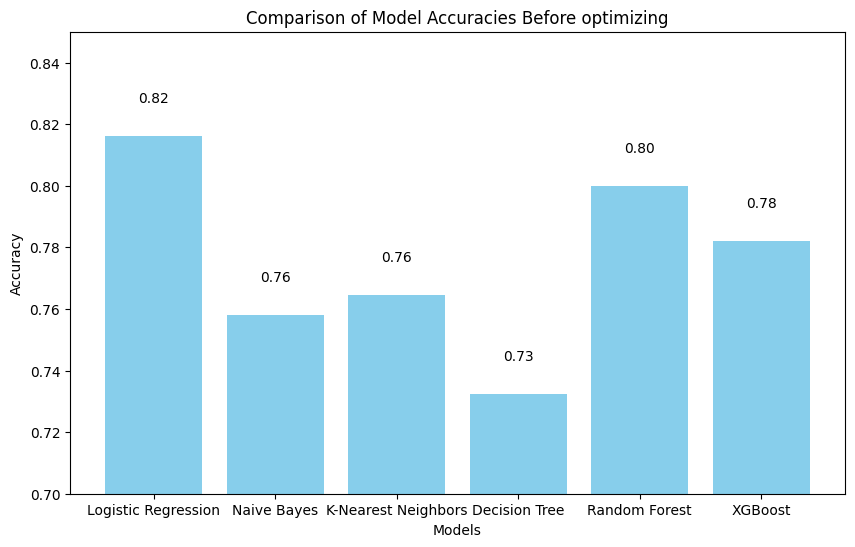

In [ ]:
accuracies = {
    "Logistic Regression": 0.8162,
    "Naive Bayes": 0.7580,
    "K-Nearest Neighbors": 0.7644,
    "Decision Tree": 0.7324,
    "Random Forest": 0.7999,
    "XGBoost": 0.7821
}

# Names of models
model_names = list(accuracies.keys())
# Corresponding accuracy scores
accuracy_values = list(accuracies.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Before optimizing')
plt.ylim([0.7, 0.85])  # Set the y-axis limits to range from 0.7 to 0.85 for better visual comparison
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()


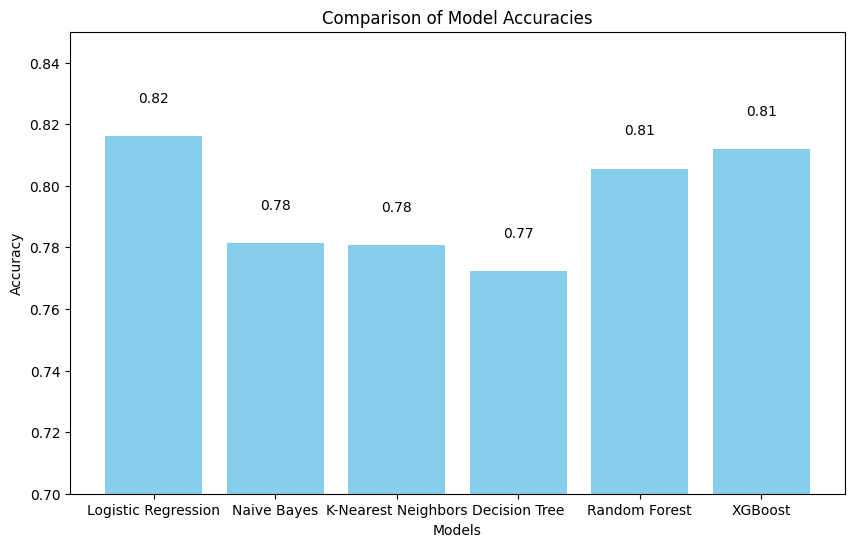

In [ ]:


# Example accuracy scores for each model
accuracy_scores = {
    "Logistic Regression":accuracy_score(y_test, y_pred_optimized),
    "Naive Bayes": accuracy_score(y_test, y_pred_optimized_nb),
    "K-Nearest Neighbors":accuracy_score(y_test, y_pred_optimized_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_optimized_dt),
    "Random Forest":accuracy_optimized_rf,
    "XGBoost":  accuracy_optimized_xgb
}

# Now we'll create a bar graph to visualize the accuracy scores of all the models.
import matplotlib.pyplot as plt

# Names of models
model_names = list(accuracy_scores.keys())
# Corresponding accuracy scores
accuracies = list(accuracy_scores.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.7, 0.85])  # Assuming accuracy scores range between 0.7 and 0.9
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()
